<a href="https://colab.research.google.com/github/sakethakella/machinelearning/blob/main/practice_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

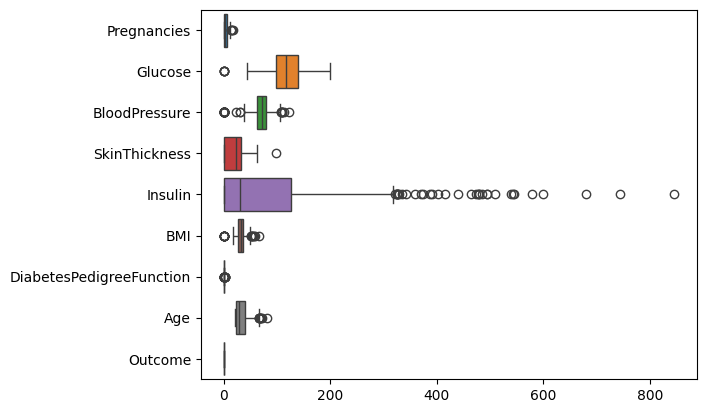

In [74]:
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('diabetes.csv')
sns.boxplot(data=df,orient='h')
plt.show()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
z_scores = np.abs(scaled_data)
threshold = 3
non_outliers = (z_scores < threshold).all(axis=1)
df = df[non_outliers]

new_data = df[df['Outcome'] > 0]
new_data2=df[df['Outcome']==0]


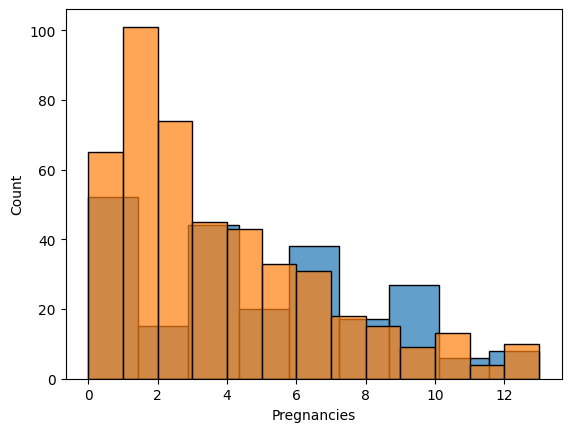

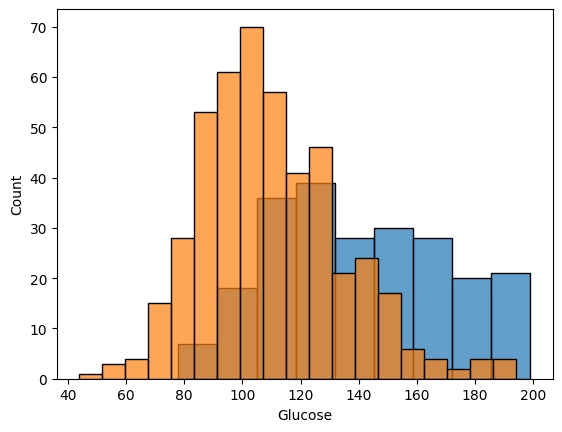

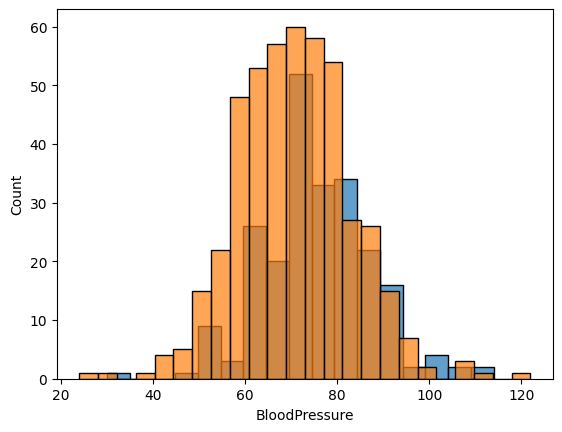

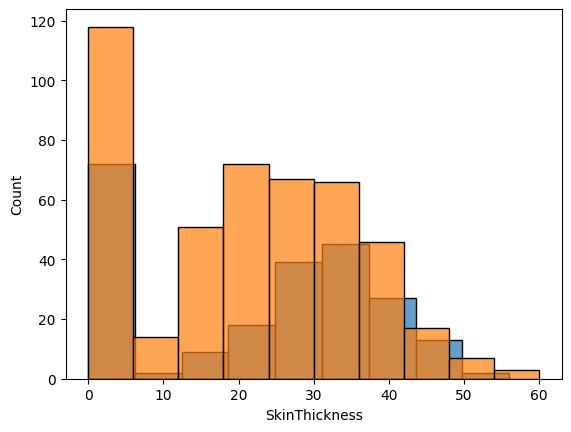

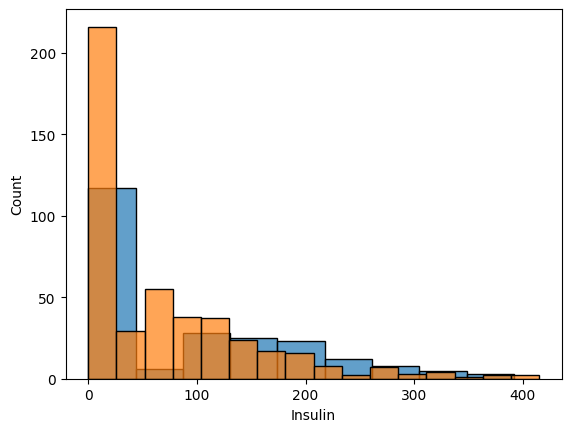

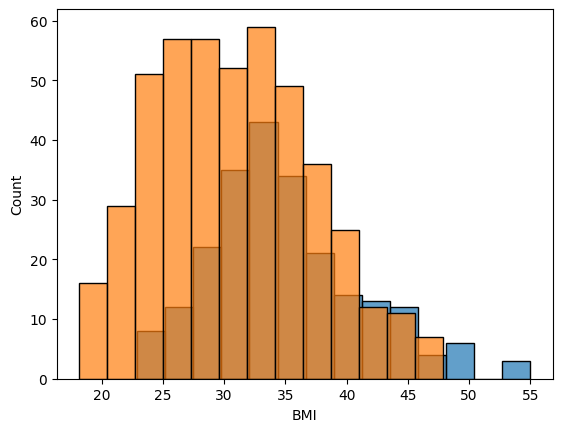

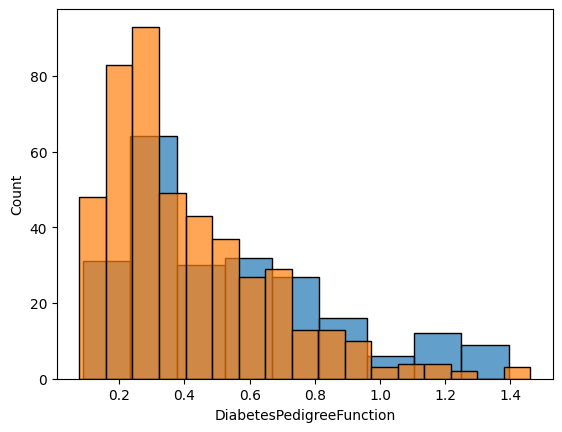

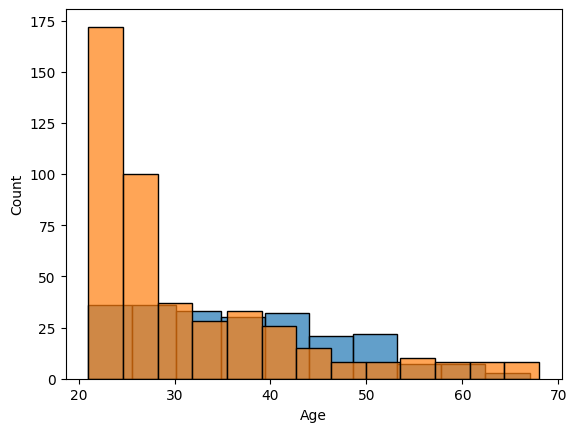

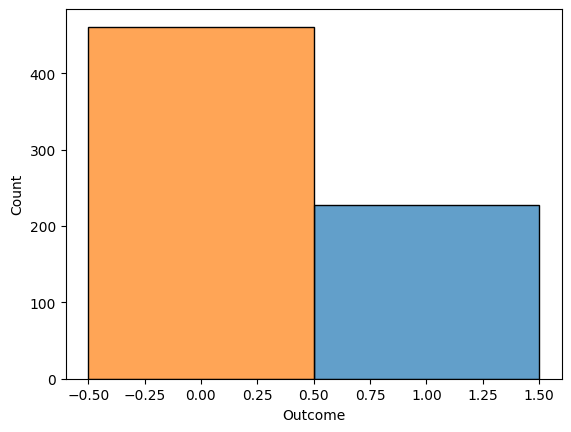

In [75]:
for i in df.columns:
 sns.histplot(data=new_data, x=i,alpha=0.7)
 sns.histplot(data=new_data2, x=i,alpha=0.7)
 plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

x_train,x_test,y_train,y_test=train_test_split(df.drop('Outcome',axis=1),df['Outcome'],test_size=0.2,random_state=42)
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)



0.7753623188405797
[[81  4]
 [27 26]]
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        85
           1       0.87      0.49      0.63        53

    accuracy                           0.78       138
   macro avg       0.81      0.72      0.73       138
weighted avg       0.79      0.78      0.76       138



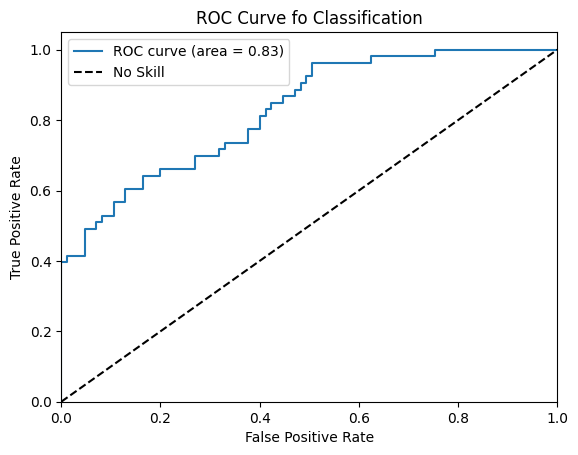

In [58]:
from sklearn.metrics import roc_curve, auc

model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
fpr,tpr,thresholds=roc_curve(y_test,model1.predict_proba(x_test)[:,1])
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve fo Classification')
plt.legend()
plt.show()

